# Task A2.3: Frozen! (5 points- Mandatory)

This is a dataset of collecting in/out temperature data over 5 months in (appx. 97000 data rows): Temperature Readings : IOT DevicesLinks to an external site.

I- Visualize the indoor and outdoor temperature in one plot with different colors of your choice for the last week (strat from the top 02-12-2018 to 08-12-2018). (2 pts-Mandatory)
II- Do these modifications on the dataframe made from the CSV dataset: (3pts Mandatory)

- Change the "In" and "Out" text of the "Out\In" column to 1 and 0 respectively.
- Separate the date and time in the "noted_date" column, into two separate columns.
- Keep only the data of the last day 08-12-2018, and remove the rest of the rows with the appropriate function

In [66]:
import pandas as pd
import matplotlib.pyplot as plt
import pandas as pd
from matplotlib.dates import DateFormatter

In [67]:
df = pd.read_csv('IOT-temp.csv')

df['noted_date'] = pd.to_datetime(df['noted_date'], format='%d-%m-%Y %H:%M')
df.sort_values(by='noted_date', inplace=True)

last_day = pd.Timestamp(df['noted_date'].iloc[-1])
start_day = last_day - pd.Timedelta(days=7)

df_last_week = df[(df['noted_date'] >= start_day) & (df['noted_date'] <= last_day)]

df_in = df_last_week[df_last_week['out/in'] == 'In']
df_out = df_last_week[df_last_week['out/in'] == 'Out']



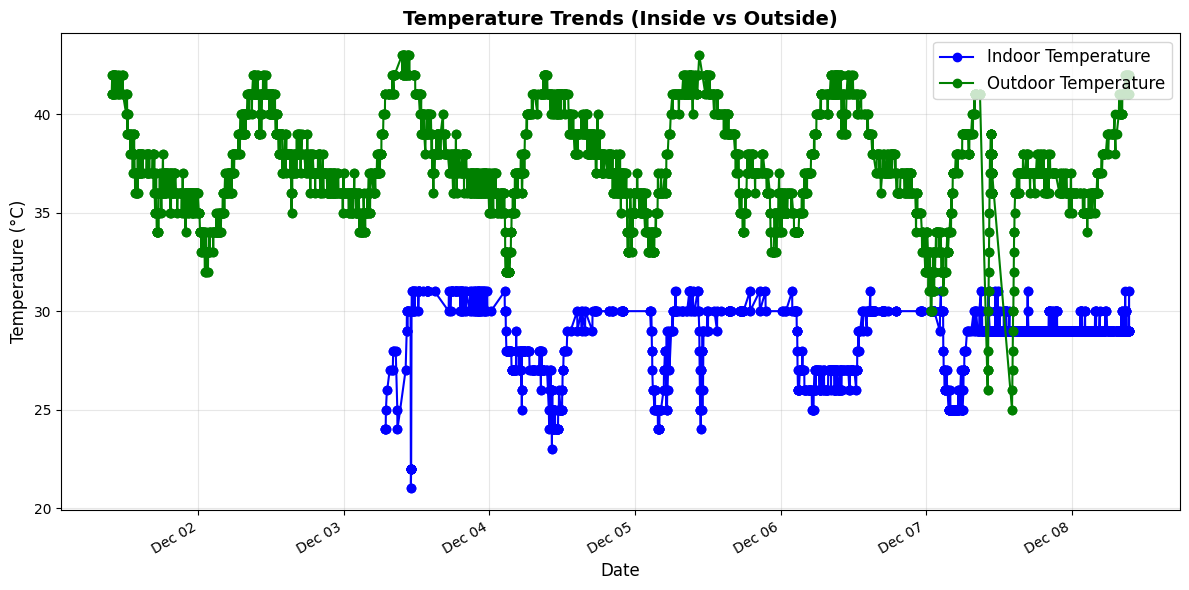

In [68]:
plt.figure(figsize=(12, 6), dpi=100)
plt.plot(df_in["noted_date"], df_in["temp"], label="Indoor Temperature", marker="o", color="blue")
plt.plot(df_out["noted_date"], df_out["temp"], label="Outdoor Temperature", marker="o", color="green")

plt.grid(alpha=0.3)

date_format = DateFormatter("%b %d")
plt.gca().xaxis.set_major_formatter(date_format)
plt.xticks(rotation=30, ha="right")
plt.xlabel("Date", fontsize=12)
plt.ylabel("Temperature (°C)", fontsize=12)
plt.title("Temperature Trends (Inside vs Outside)", fontsize=14, fontweight="bold")
plt.legend(loc="upper right", fontsize=12)

plt.tight_layout()
plt.show()

# II- Do these modifications on the dataframe made from the CSV dataset: (3pts Mandatory)

In [ ]:
df['out/in'] = df['out/in'].astype(str).str.strip().str.title()


df['out/in'] = df['out/in'].map({'In': 1, 'Out': 0}).fillna(0)
df['Date'] = df['noted_date'].dt.date
df['Time'] = df['noted_date'].dt.time

date_to_keep = df['Date'].iloc[-1] # 2018-12-08

df.drop('noted_date', axis=1, inplace=True)
columns = list(df.columns)
columns.insert(2, columns.pop(columns.index('Date')))
columns.insert(3, columns.pop(columns.index('Time')))
df = df[columns]

df = df[df['Date'] == date_to_keep]
df.to_csv('IOT-temp_updated.csv', index=False)